# GOAL:

## To understand factors affecting customer churn, visualize trends, and extract actionable business insights.

##  Why This Project?

1. Explore factors related to customer churn

2. Visualize key features and churn rates

3. Draw insights on churn drivers and potential retention strategies

##  Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  Load Dataset

In [2]:
df = pd.read_csv('telecom_customer_churn.csv')
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


##   Data Exploration 

In [3]:
print("Shape of dataset:", df.shape)
print("\nInfo about dataset:\n")
df.info()
print("\nMissing values per column:\n", df.isnull().sum())
print("\nDescriptive statistics:\n", df.describe(include='all'))

Shape of dataset: (7043, 38)

Info about dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer

##  Insights

1. Contains customer demographic and account features.

2. Key target is 'Churn'.

3. Several categorical and numerical variables present.


##  Data Cleaning

In [9]:
for col in df.select_dtypes('number').columns:
    df[col].fillna(df[col].median(), inplace=True)
for col in df.select_dtypes('object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4408\2155479873.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4408\2155479873.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

## Explore Churn-Related Columns

In [10]:
print("\nCustomer Status value counts:\n", df['Customer Status'].value_counts())
print("\nChurn Category value counts:\n", df['Churn Category'].value_counts())
print("\nChurn Reason value counts:\n", df['Churn Reason'].value_counts())


Customer Status value counts:
 Customer Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64

Churn Category value counts:
 Churn Category
Competitor         6015
Dissatisfaction     321
Attitude            314
Price               211
Other               182
Name: count, dtype: int64

Churn Reason value counts:
 Churn Reason
Competitor had better devices                5487
Competitor made better offer                  311
Attitude of support person                    220
Don't know                                    130
Competitor offered more data                  117
Competitor offered higher download speeds     100
Attitude of service provider                   94
Price too high                                 78
Product dissatisfaction                        77
Network reliability                            72
Long distance charges                          64
Service dissatisfaction                        63
Moved                                       

##  Churn Rate Barplot (Use 'Customer Status')

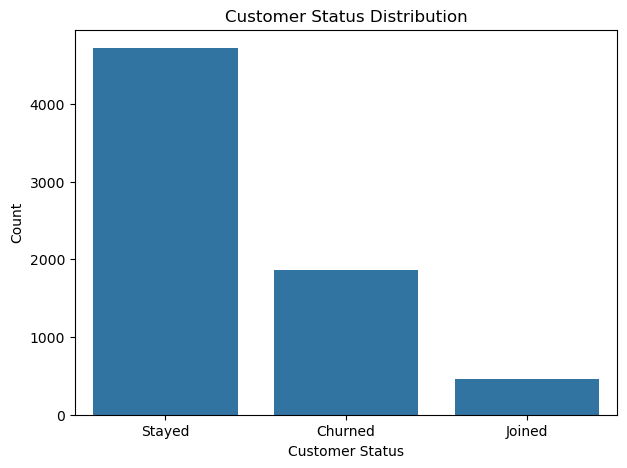

In [11]:
plt.figure(figsize=(7,5))
sns.countplot(x='Customer Status', data=df)
plt.title('Customer Status Distribution')
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.show()

## Insight:

1. Shows how many customers are Active, Churned, etc.

2. Use 'Customer Status' for churn-related analysis as there's no 'Churn' column.

## Monthly Charges by Customer Status Boxplot

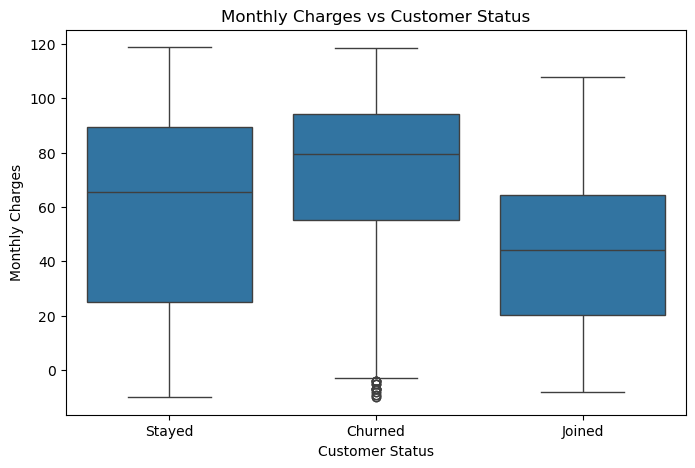

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Customer Status', y='Monthly Charge', data=df)
plt.title('Monthly Charges vs Customer Status')
plt.xlabel('Customer Status')
plt.ylabel('Monthly Charges')
plt.show()

## Insight:

1. Customers who churn may have higher or lower monthly charges.

2. Relevant for identifying price-sensitive segments.

##  Tenure by Customer Status Boxplot

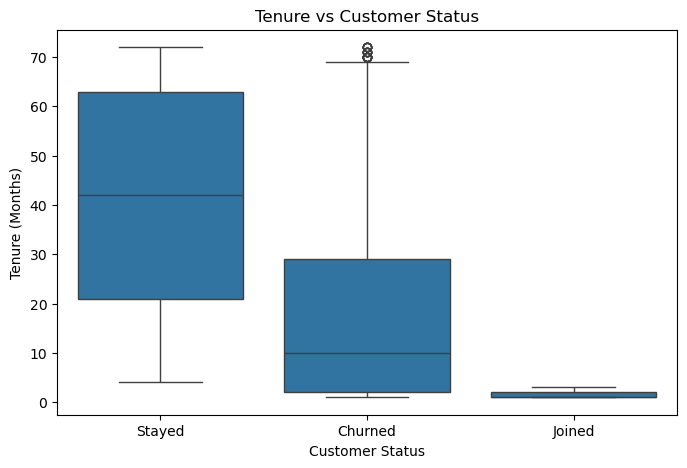

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Customer Status', y='Tenure in Months', data=df)
plt.title('Tenure vs Customer Status')
plt.xlabel('Customer Status')
plt.ylabel('Tenure (Months)')
plt.show()

## Insight:

1. Shorter tenure associates with higher churn.

2. Loyal customers have longer tenure.

##  Churn by Contract Type

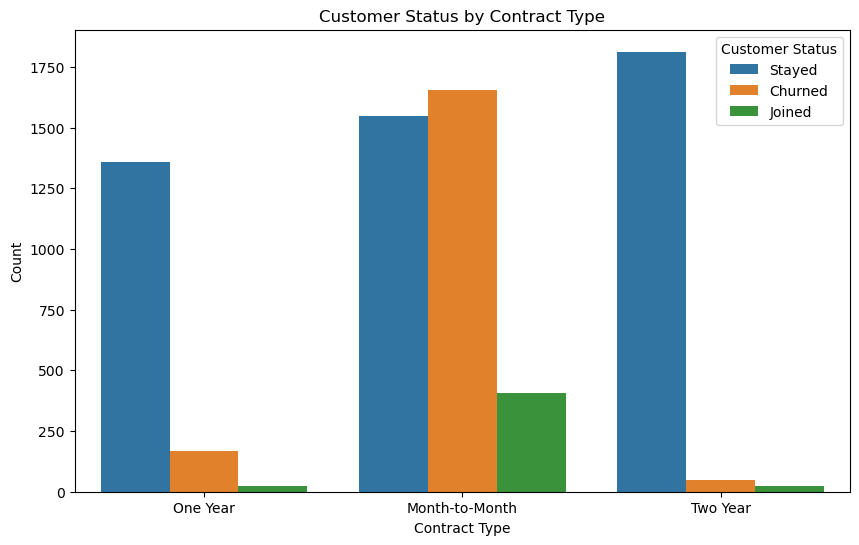

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x='Contract', hue='Customer Status', data=df)
plt.title('Customer Status by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Customer Status')
plt.show()

## Insight:

1. Churn can be analyzed across different contract types (Month-to-month, One year, Two year).

2. Contract type impacts retention rates.

## Churn Category Barplot

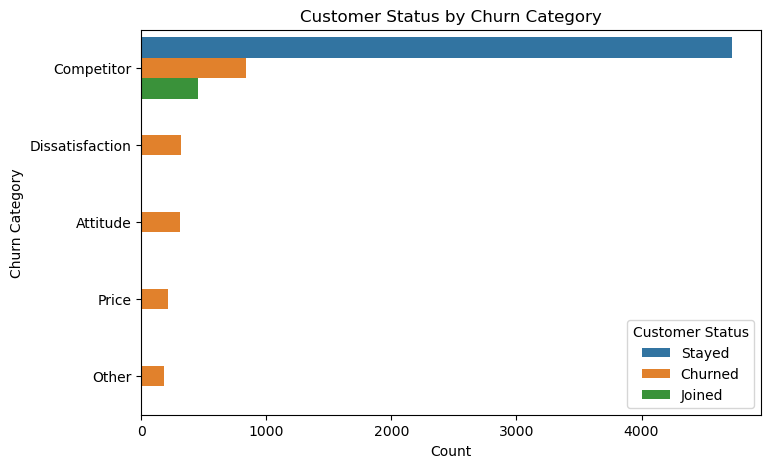

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(y='Churn Category', hue='Customer Status', data=df, order=df['Churn Category'].value_counts().index)
plt.title('Customer Status by Churn Category')
plt.xlabel('Count')
plt.ylabel('Churn Category')
plt.legend(title='Customer Status')
plt.show()

## Insight:

1. Understand primary business areas affected by churn (like 'Voluntary', 'Competitor', etc.).


#  Final Insights

1. Key churn indicators: Customer Status, Contract, Tenure, Charges, Churn Category.

2. Targeted retention strategies should focus on contract type and tenure.

3. These trends guide business focus for churn reduction and improved retention.